<a href="https://colab.research.google.com/github/holydiver-zerog/repository-public/blob/main/DLtest6_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# list6.1.py
!pip install japanize-matplotlib
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import layers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 30.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=8e83dc2af1021bf671b1ea06dbec0f2a1cb245e941f27340921dace779ca5af1
  Stored in directory: /root/.cache/pip/wheels/c1/f7/9b/418f19a7b9340fc16e071e89efc379aca68d40238b258df53d
Successfully built japanize-matplotlib


In [2]:
# list6.2.py
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(f"学習データ（問題画像）　：{x_train.shape}")
print(f"テストデータ（問題画像）：{x_test.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
学習データ（問題画像）　：(50000, 32, 32, 3)
テストデータ（問題画像）：(10000, 32, 32, 3)


In [3]:
# list6.3.py
y_train, y_test = y_train.flatten(), y_test.flatten()

cat_train = x_train[np.where(y_train==3)]
dog_train = x_train[np.where(y_train==5)]
cat_test = x_test[np.where(y_test==3)]
dog_test = x_test[np.where(y_test==5)]

print("ネコ学習データ　：", len(cat_train))
print("イヌ学習データ　：", len(dog_train))
print("ネコテストデータ：", len(cat_test))
print("イヌテストデータ：", len(dog_test))

ネコ学習データ　： 5000
イヌ学習データ　： 5000
ネコテストデータ： 1000
イヌテストデータ： 1000


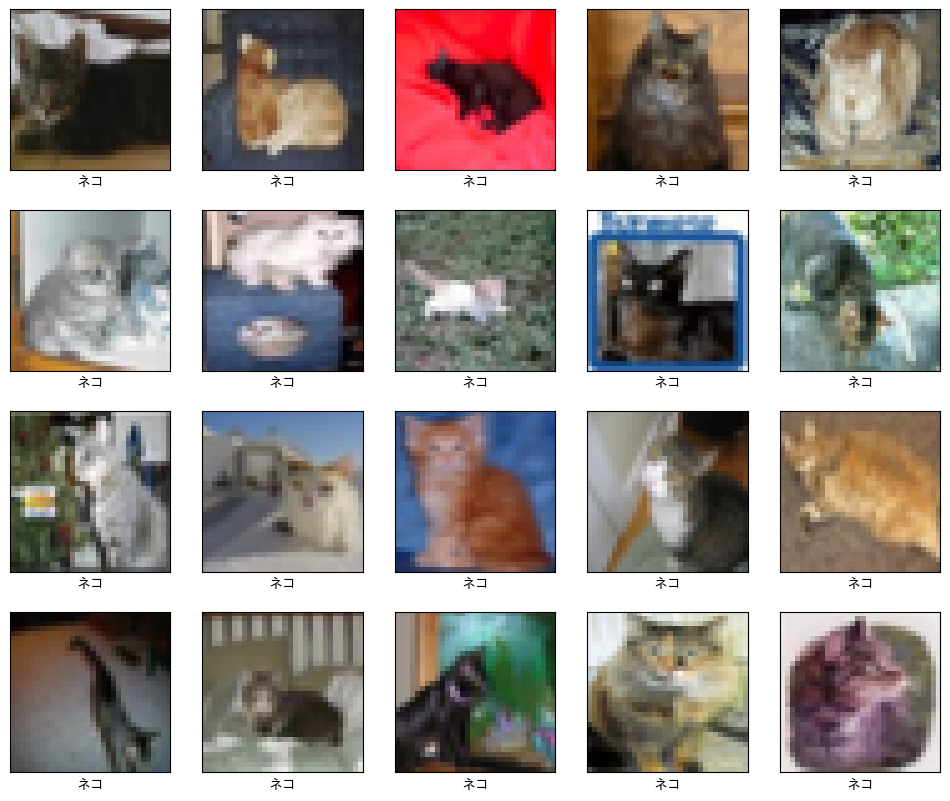

In [4]:
# list6.4.py
def disp_testdata(xdata, namedata):
    plt.figure(figsize=(12,10))
    for i in range(20):
        plt.subplot(4,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(xdata[i])
        plt.xlabel(namedata)
    plt.show()

disp_testdata(cat_train, "ネコ")

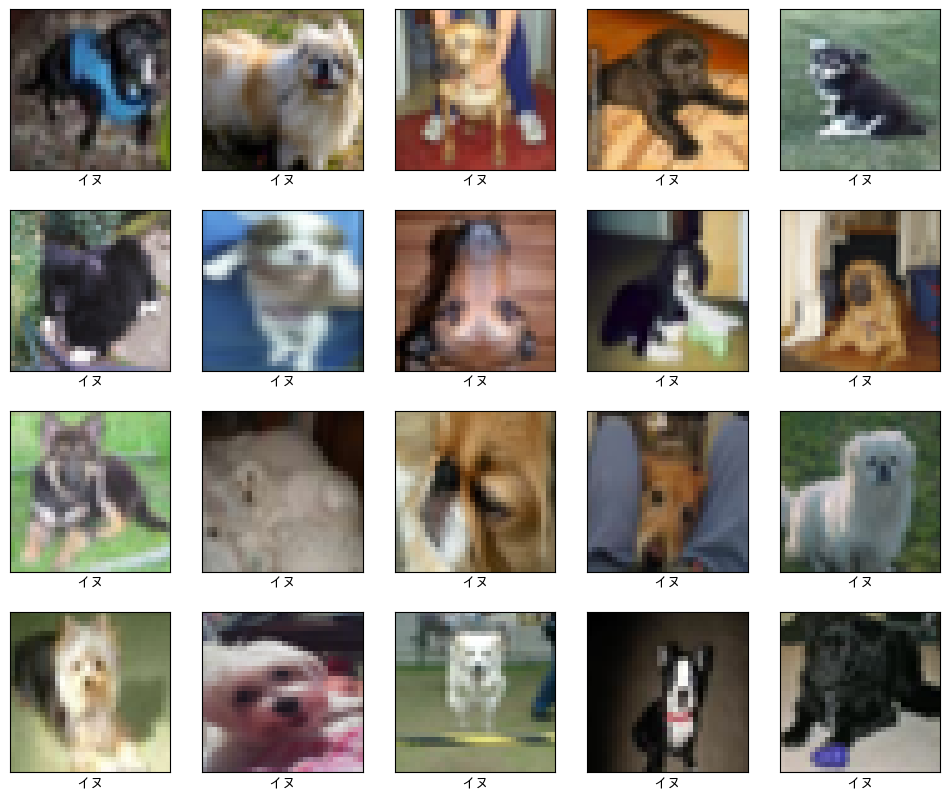

In [5]:
# list6.5.py
disp_testdata(dog_train, "イヌ")

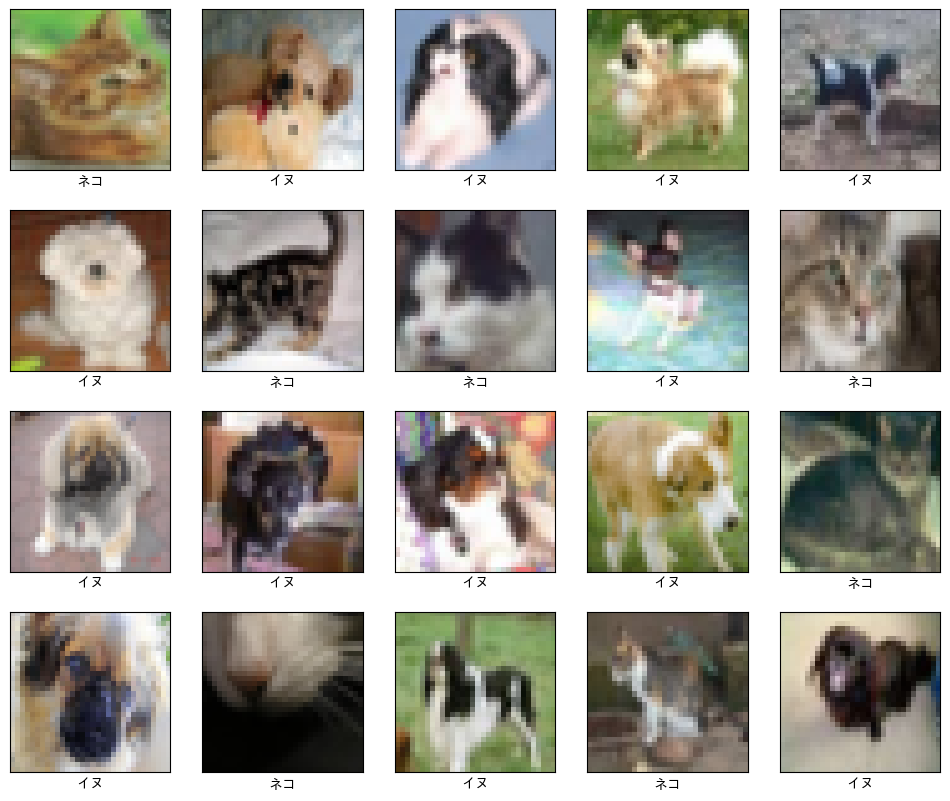

In [6]:
# list6.6.py
class_names = ["ネコ", "イヌ"]

x_train = np.concatenate((cat_train, dog_train))
x_test = np.concatenate((cat_test, dog_test))

y_train = np.concatenate((np.full(5000, 0), np.full(5000, 1)))
y_test = np.concatenate((np.full(1000, 0), np.full(1000, 1)))

np.random.seed(1)
np.random.shuffle(x_test)
np.random.seed(1)
np.random.shuffle(y_test)

plt.figure(figsize=(12,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i])
    plt.xlabel(class_names[y_test[i]])
plt.show()

In [7]:
# list6.7.py
model = keras.models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation="relu", input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (5, 5), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(2, activation="softmax")) #2
model.summary(line_length=120)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━
┃ Layer (type)                                        ┃ Output Shape                           ┃               Para
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━
│ conv2d (Conv2D)                                     │ (None, 28, 28, 32)                     │                 2,
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ max_pooling2d (MaxPooling2D)                        │ (None, 14, 14, 32)                     │                   
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ dropout (Dropout)                                   │ (None, 14, 14, 32)                     │                   
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ conv2d_1 (Conv2D)                                   │ (None, 10, 10, 64)                     │                51,
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ max_pooling2d_1 (MaxPooling2D)                      │ (None, 5, 5, 64)                       │                   
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ dropout_1 (Dropout)                                 │ (None, 5, 5, 64)                       │                   
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ flatten (Flatten)                                   │ (None, 1600)                           │                   
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ dense (Dense)                                       │ (None, 64)                             │               102,
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ dropout_2 (Dropout)                                 │ (None, 64)                             │                   
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ dense_1 (Dense)                                     │ (None, 32)                             │                 2,
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ dense_2 (Dense)                                     │ (None, 2)                              │                   
└─────────────────────────────────────────────────────┴────────────────────────────────────────┴───────────────────

 Total params: 158,306 (618.38 KB)

 Trainable params: 158,306 (618.38 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# list6.8.py
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=30, #30
                    validation_data=(x_test, y_test))
test_loss, test_acc =model.evaluate(x_test, y_test)
print(f"テストデータの正解率は{test_acc:.2%}です。")

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.5431 - loss: 0.6864 - val_accuracy: 0.6275 - val_loss: 0.6480
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.6349 - loss: 0.6402 - val_accuracy: 0.6705 - val_loss: 0.5999
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6732 - loss: 0.6008 - val_accuracy: 0.6775 - val_loss: 0.5915
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 51ms/step - accuracy: 0.6937 - loss: 0.5803 - val_accuracy: 0.7175 - val_loss: 0.5431
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.7189 - loss: 0.5347 - val_accuracy: 0.7140 - val_loss: 0.5460
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.7303 - loss: 0.5249 - val_accuracy: 0.7405 - val_loss: 0.5180
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.7512 - loss: 0.5020 - val_accuracy: 0.7295 - val_loss: 0.5231
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.7611 - loss: 0.4813 - 

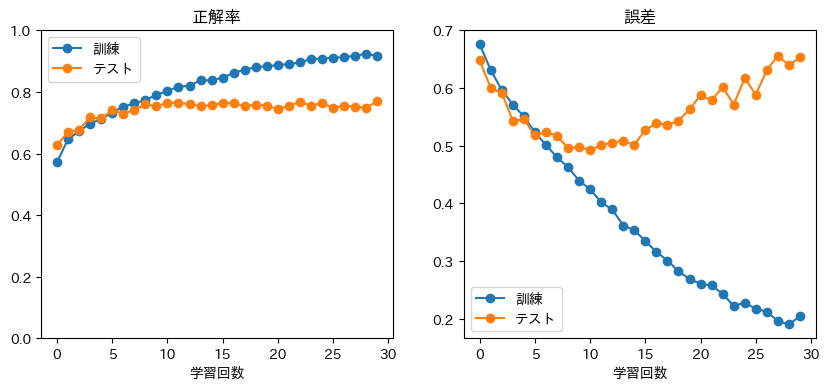

In [9]:
# list6.9.py
param = [["正解率", "accuracy", "val_accuracy"],
          ["誤差", "loss", "val_loss"]]
plt.figure(figsize=(10,4))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.title(param[i][0])
    plt.plot(history.history[param[i][1]], "o-")
    plt.plot(history.history[param[i][2]], "o-")
    plt.xlabel("学習回数")
    plt.legend(["訓練","テスト"], loc="best")
    if i==0:
        plt.ylim([0,1])
plt.show()

In [17]:
# list6.10.py
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range = 30,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip=True,
)
g = datagen.flow(x_test, y_test,  shuffle=False)
g_imgs1 = []
x_g, y_g = g.next()
g_imgs1.extend(x_g)

g = datagen.flow(x_test, y_test,  shuffle=False)
g_imgs2 = []
x_g, y_g = g.next()
g_imgs2.extend(x_g)

plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(3, 6, i+1)
    plt.imshow(x_test[i], cmap="Greys")
    plt.title(class_names[y_g[i]])

for i in range(6):
    plt.subplot(3, 6, i+7)
    plt.imshow(g_imgs1[i])

for i in range(6):
    plt.subplot(3, 6, i+13)
    plt.imshow(g_imgs2[i])
plt.show()

ImportError: cannot import name 'ImageDataGenerator' from 'keras.preprocessing.image' (/usr/local/lib/python3.12/dist-packages/keras/preprocessing/image/__init__.py)

In [13]:
# list6.11.py
history = model.fit(datagen.flow(x_train, y_train), epochs=30,
                    validation_data=(x_test, y_test))
test_loss, test_acc =model.evaluate(x_test, y_test)
print(f"テストデータの正解率は{test_acc:.2%}です。")

NameError: name 'datagen' is not defined

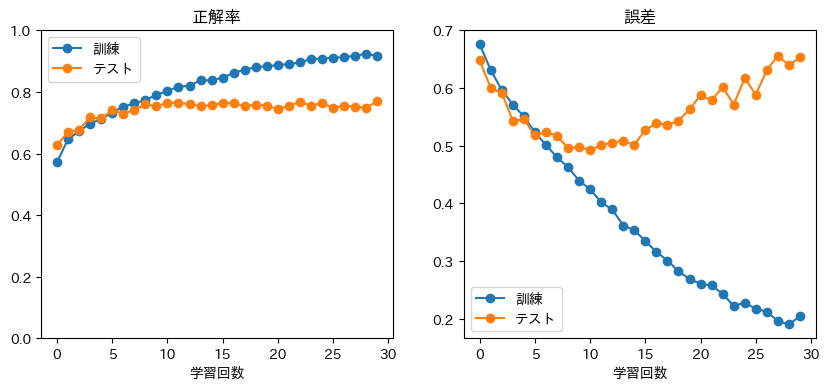

In [14]:
# list6.12.py
param = [["正解率", "accuracy", "val_accuracy"],
          ["誤差", "loss", "val_loss"]]
plt.figure(figsize=(10,4))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.title(param[i][0])
    plt.plot(history.history[param[i][1]], "o-")
    plt.plot(history.history[param[i][2]], "o-")
    plt.xlabel("学習回数")
    plt.legend(["訓練","テスト"], loc="best")
    if i==0:
        plt.ylim([0,1])
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


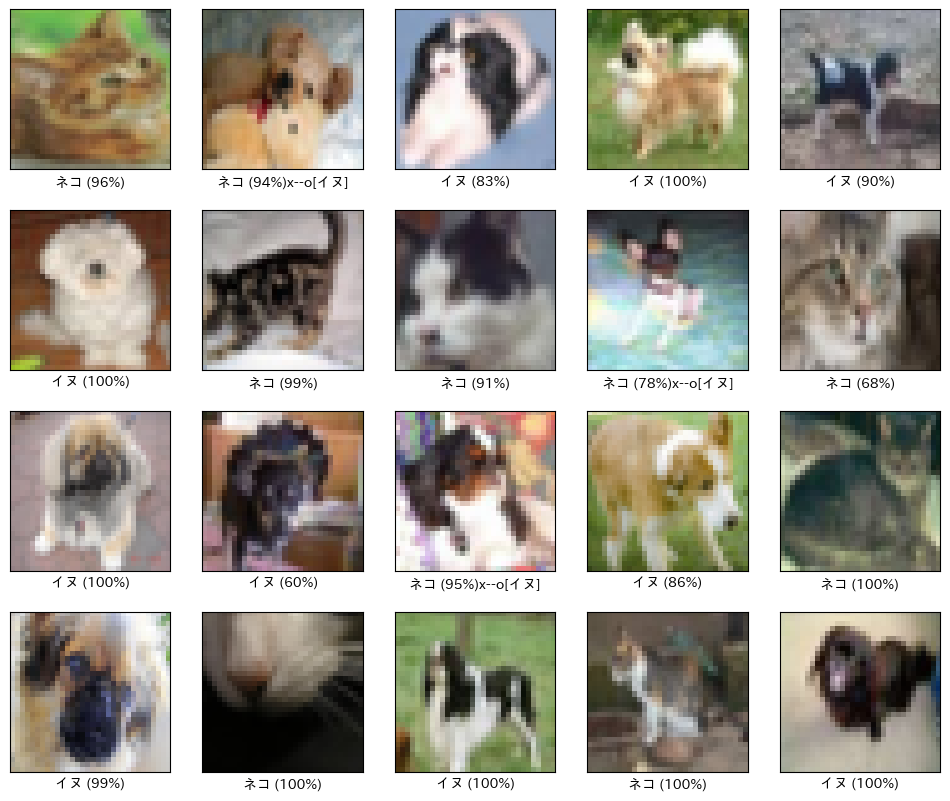

In [15]:
# list6.13.py
pre = model.predict(x_test)

plt.figure(figsize=(12,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i])

    index = np.argmax(pre[i])
    pct = pre[i][index]
    ans = ""
    if index != y_test[i]:
        ans = "x--o["+class_names[y_test[i]]+"]"
    lbl = f"{class_names[index]} ({pct:.0%}){ans}"
    plt.xlabel(lbl)
plt.show()